In [2]:
import sympy as sy

# 3x3-Oscillations-numeric
Check matrix equation against analytic result

# Definitionen

In [3]:
L  = sy.symbols("L",real=True, positive=True)

In [4]:
vtorad = (sy.pi/180.).evalf()
vt12 = 33.6*vtorad 
vt23 = 47.6*vtorad
vt13 = 8.5*vtorad
vdelta = (1.36*sy.pi).evalf()
vdm21 = 7.53e-5  # eV**2
vdm32 = 2.453e-3 # eV**2    
vm1 = 0
vm2 = vm1 + vdm21
vm3 = vm2 + vdm32
fnum = 5.0677

In [5]:
def mPabv(L,ia=0, ib=0, vMeV=1, fvm1=0, fvt12=1, fvt23=1, fvt13=1, fvdm21=1,fvdm32=1, anti=True):
    # ------------------------------------------------------------
    # Calculate 3x3 vacuum oscillations numerically
    # ia, ib flavor indices for a=in, b=out ia,ib = (0,1,2)
    # fvmt1 =0: value for m1
    # fvt12=1, fvt23=1, fvt13=1: factor applied to mixing angles
    #                            fvtij = 0: set this angle to 0
    # Calculate 3x3 vacuum oscillations numerically
    # Return complex Pab  
    # ------------------------------------------------------------
    vtorad = (sy.pi/180.).evalf()
    vt12 = 33.7*vtorad * fvt12
    vt23 = 47.6*vtorad * fvt23
    vt13 = 8.5*vtorad  * fvt13
    vdelta = (1.36*sy.pi).evalf()
    vdm21 = 7.53e-5 * fvdm21 # eV**2
    vdm32 = 2.453e-3 * fvdm32 # eV**2    
    vm1 = fvm1
    vm2 = vm1 + vdm21
    vm3 = vm2 + vdm32
    fnum = 5.0677
    #
    vs12 = sy.sin(vt12).evalf()
    vs23 = sy.sin(vt23).evalf()
    vs13 = sy.sin(vt13).evalf()
    vc12 = sy.cos(vt12).evalf()
    vc23 = sy.cos(vt23).evalf()
    vc13 = sy.cos(vt13).evalf()
    vepd = sy.exp(+sy.I*vdelta)
    vemd = sy.exp(-sy.I*vdelta)
    #
    vU = sy.Matrix([
    [vc12*vc13, vs12*vc13, vs13*vemd],
    [-vc23*vs12-vc12*vs23*vs13*vepd, vc12*vc23-vs12*vs23*vs13*vepd, vc13*vs23],
    [vs12*vs23-vc12*vc23*vs13*vepd, -vc12*vs23-vc23*vs12*vs13*vepd, vc13*vc23]
    ]).evalf() 
    #
    vP = sy.Matrix([
    [sy.exp(-fnum*sy.I*vm1*L/vMeV/2),0,0],
    [0, sy.exp(-fnum*sy.I*vm2*L/vMeV/2),0],
    [0,0, sy.exp(-fnum*sy.I*vm3*L/vMeV/2)]
    ]).evalf()
    #
    vUc = (sy.conjugate(vU)).evalf()
    vUi = (vUc.T).evalf()
    vUci = (vU.T).evalf()
    # 
    if ia == 0:
        va=sy.Matrix([[1],[0],[0]])
    elif ia == 1: 
        va=sy.Matrix([[0],[1],[0]])
    elif ia == 2: 
        va=sy.Matrix([[0],[0],[1]])
    else:
        raise
    # 
    if anti:
        nub = ((vU*vP*vUi*va)[ib]).evalf()
    else: 
        nub = ((vUc*vP*vUci*va)[ib]).evalf()
    return (nub*sy.conjugate(nub)).evalf()

(0.692147661329902 + 0.307852338670098*exp(-0.00012719927*I*L))*(0.307852338670098*exp(0.00012719927*I*L) + 0.692147661329902) (-0.46160510855649 + 0.46160510855649*exp(-0.00012719927*I*L))*(0.46160510855649*exp(0.00012719927*I*L) - 0.46160510855649)
mPee:  0.996557096814016 0.00344290318598412


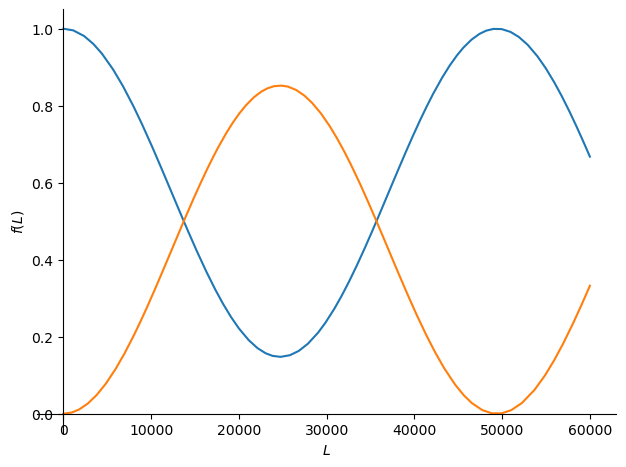

In [6]:
# Test mPabv: e-mu
mPee=mPabv(L,ia=0, ib=0, vMeV=1.5,fvm1=0, fvt12=1, fvt23=0, fvt13=0, fvdm21=1,fvdm32=0 )
mPem=mPabv(L,ia=0, ib=1, vMeV=1.5,fvm1=0, fvt12=1, fvt23=0, fvt13=0, fvdm21=1,fvdm32=0 )
print(mPee, mPem)
print("mPee: ",(mPee.subs(L,1e3)).evalf(), (mPem.subs(L,1e3)).evalf())
sy.plot(mPee,mPem,(L,0,6e4))

(0.45468370990111 + 0.54531629009889*exp(-0.00621553405*I*L))*(0.54531629009889*exp(0.00621553405*I*L) + 0.45468370990111) (-0.497942199307985 + 0.497942199307985*exp(-0.00621553405*I*L))*(0.497942199307985*exp(0.00621553405*I*L) - 0.497942199307985)
mPee:  0.959705942234157 0.0402940577658429


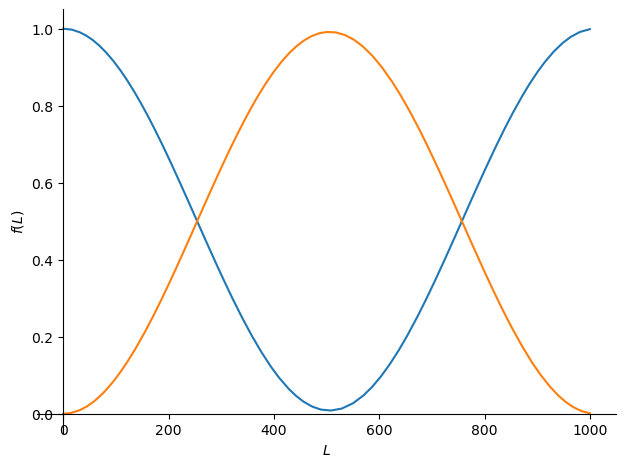

In [7]:
# Test mPab: mu-tau
mPee=mPabv(L,ia=1, ib=1, vMeV=1,fvm1=0, fvt12=0, fvt23=1, fvt13=0, fvdm21=0,fvdm32=1 )
mPem=mPabv(L,ia=1, ib=2, vMeV=1,fvm1=0, fvt12=0, fvt23=1, fvt13=0, fvdm21=0,fvdm32=1 )
print(mPee, mPem)
print("mPee: ",(mPee.subs(L,6e3)).evalf(), (mPem.subs(L,6e3)).evalf())
sy.plot(mPee,mPem,(L,0,1e3))

In [8]:
def aPabv(vL,vE, vth, vdm, Paa=True): 
    # --------------------------------
    # calculate 2x2 oscillations numerically 
    # vL : length in m
    # vE : energy in MeV
    # vth : mixing angle theta in degrees
    # vdm : Delta(m_i**2 - m_j**2) 

    vtorad = (sy.pi/180.).evalf()
    fnum = 5.0677
    if Paa == True: 
        r = 1 - (sy.sin(2*vth))**2 * (sy.sin(fnum*vdm*vL/4/vE))**2
    else: 
        r = (sy.sin(2*vth))**2 * (sy.sin(fnum*vdm*vL/4/vE))**2
    return r.evalf() 

1.0 - 0.991785735406693*sin(0.003107767025*L)**2 0.991785735406693*sin(0.003107767025*L)**2
aPmm:  0.959705942234157 0.0402940577658429


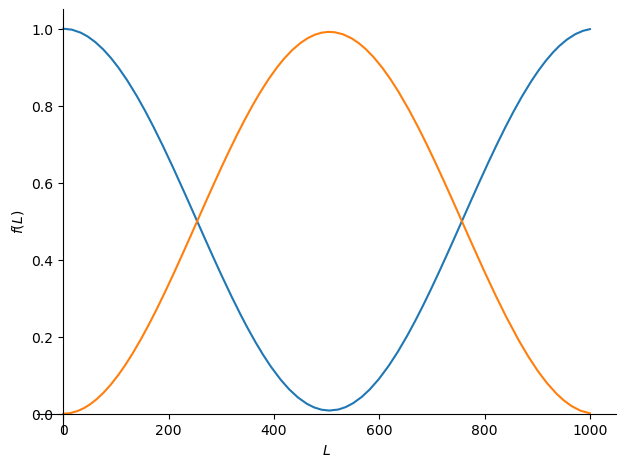

In [9]:
# Test mPab: mu-tau
aPmm=aPabv(L,vE=1, vth=vt23, vdm=vdm32, Paa=True)
aPmt=aPabv(L,vE=1, vth=vt23, vdm=vdm32, Paa=False)
print(aPmm,aPmt)
print("aPmm: ",(aPmm.subs(L,6e3)).evalf(),(aPmt.subs(L,6e3)).evalf())
sy.plot(aPmm,aPmt,(L,0,1e3))

In [10]:
def aPab3v(L,ia=0, ib=0, vE=1, fvm1=0, fvt12=1, fvt23=1, fvt13=1, fvdm21=1,fvdm32=1, anti=True):
    # ------------------------------------------------------------
    # Calculate 3x3 oscillation using the oscillation formula of PDG
    # ia, ib flavor indices for a=in, b=out ia,ib = (0,1,2)
    # fvmt1 =0: value for m1
    # fvt12=1, fvt23=1, fvt13=1: factor applied to mixing angles
    #                            fvtij = 0: set this angle to 0
    # Calculate 3x3 vacuum oscillations numerically
    # Return complex Pab  
    # ------------------------------------------------------------

    vtorad = (sy.pi/180.).evalf()
    vt12 = 33.6*vtorad * fvt12
    vt23 = 47.6*vtorad * fvt23
    vt13 = 8.5*vtorad  * fvt13
    vdelta = (1.36*sy.pi).evalf()
    vdm21 = 7.53e-5 * fvdm21 # eV**2
    vdm32 = 2.453e-3 * fvdm32 # eV**2    
    vm1 = fvm1
    vm2 = vm1 + vdm21
    vm3 = vm2 + vdm32
    vm  = [vm1,vm2,vm3]
    fnum = 5.0677
    #
    vs12 = sy.sin(vt12).evalf()
    vs23 = sy.sin(vt23).evalf()
    vs13 = sy.sin(vt13).evalf()
    vc12 = sy.cos(vt12).evalf()
    vc23 = sy.cos(vt23).evalf()
    vc13 = sy.cos(vt13).evalf()
    vepd = sy.exp(+sy.I*vdelta)
    vemd = sy.exp(-sy.I*vdelta)
    #
    vU = sy.Matrix([
    [vc12*vc13, vs12*vc13, vs13*vemd],
    [-vc23*vs12-vc12*vs23*vs13*vepd, vc12*vc23-vs12*vs23*vs13*vepd, vc13*vs23],
    [vs12*vs23-vc12*vc23*vs13*vepd, -vc12*vs23-vc23*vs12*vs13*vepd, vc13*vc23]
    ]).evalf() 
    #
    vUc = (sy.conjugate(vU)).evalf()
    vUi = (vUc.T).evalf()
    vUci = (vU.T).evalf()    
    #
    dab = 0
    if ia == ib: 
        dab = 1
    #
    R = 0
    I = 0
    for j in range(0,3):
        for i in range(0,3):
            if i >= j: continue
            R = R + sy.re(vU[ia,i]*vUc[ib,i]*vUc[ia,j]*vU[ib,j]) * sy.sin( fnum*(vm[i]-vm[j])*L/4/vE  )**2
            I = I + sy.im(vU[ia,i]*vUc[ib,i]*vUc[ia,j]*vU[ib,j]) * sy.sin( 2*fnum*(vm[i]-vm[j])*L/4/vE  )                
    
    if anti:    
        R = (4*R).evalf()
        I = (2*I).evalf()
        P = (dab-R-I).evalf()
    else: 
        R = (4*R).evalf()
        I = (2*I).evalf()
        P = (dab-R+I).evalf()
    return R,I,P
        

In [33]:
# compare matrix method with analytical formula
m3a = mPabv(L,ia=1, ib=2, vMeV=1.5, fvm1=0, fvt12=1, fvt23=1, fvt13=1, fvdm21=1,fvdm32=1, anti=True)
a3p = aPab3v(L,ia=1, ib=2, vE=1.5, fvm1=0, fvt12=1, fvt23=1, fvt13=1, fvdm21=1,fvdm32=1, anti=True)

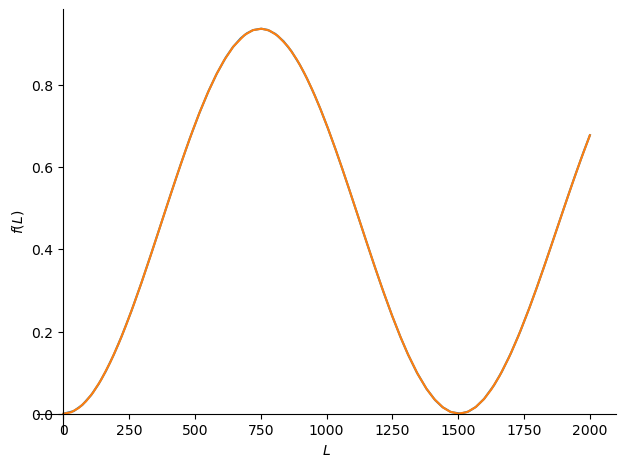

In [36]:
sy.plot(m3a,a3p[2],(L,0,2e3))
#print(m3a.subs(L,1e3))
#print(a3p[2].subs(L,1e3))

In [37]:
m3a = mPabv(L,ia=0, ib=0, vMeV=1, fvm1=0, fvt12=1, fvt23=0, fvt13=0, fvdm21=1,fvdm32=1, anti = True)
m3p = mPabv(L,ia=0, ib=1, vMeV=1, fvm1=0, fvt12=1, fvt23=0, fvt13=0, fvdm21=1,fvdm32=0, anti = False)

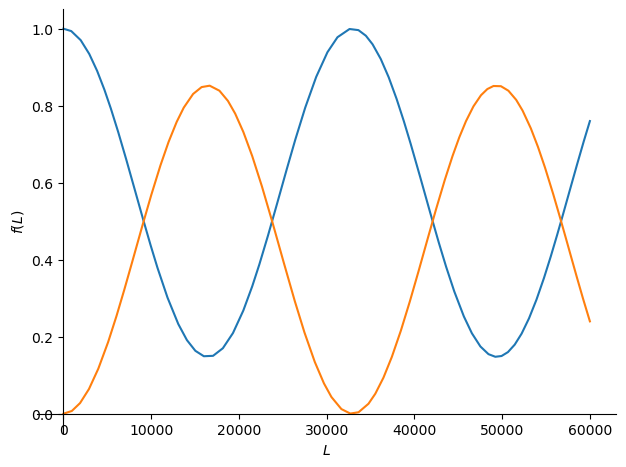

0.749944758206248
0.250055241793752


In [38]:
sy.plot(m3a,m3p,(L,0,6e4))
print(m3a.subs(L,6e3).evalf())
print(m3p.subs(L,6e3).evalf())